In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-risk-analysis/sample_submission.csv
/kaggle/input/heart-attack-risk-analysis/train.csv
/kaggle/input/heart-attack-risk-analysis/test.csv


In [4]:
# Read the CSV file
train = pd.read_csv("/kaggle/input/heart-attack-risk-analysis/train.csv")
train

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,BCB2291,29,Female,267,104/105,87,0,0,0,1,...,6.806894,236184,27.521246,598,4,5,France,Europe,Northern Hemisphere,0
7006,KIG5207,83,Male,296,134/99,77,1,1,1,1,...,3.015648,264390,21.332449,465,4,4,United Kingdom,Europe,Northern Hemisphere,0
7007,GCY1316,54,Male,120,134/84,103,1,1,1,1,...,4.825724,198358,37.465577,674,6,9,Colombia,South America,Northern Hemisphere,0
7008,RPK2629,42,Female,147,144/76,81,0,0,1,0,...,6.546390,202828,28.605789,623,7,10,Spain,Europe,Southern Hemisphere,1


In [ ]:
# Find the mean heart attack risk 
train["Heart Attack Risk"].mean()

In [92]:

# import math
# # Sort the data by heart attack risk so that they're all togther. 
# train.sort_values(by="Heart Attack Risk", inplace=True)

# train.reset_index(inplace=True)

# for x in range(math.floor(len(train[train["Heart Attack Risk"] == 0])*0.4)):
#     train.drop(x, inplace=True)

In [ ]:
train["Heart Attack Risk"].mean()

In [ ]:
train

In [ ]:

#train = pd.concat([train, train[train["Heart Attack Risk"] == 1]])

In [ ]:
train["Heart Attack Risk"].mean()

In [5]:
# The blood pressure column is currently an object type. We need to split it into two columns and convert them to numeric type so we can train.
train[['Systolic', 'Diastolic']] = train['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type because they are currently objects
train.Systolic = pd.to_numeric(train.Systolic)
train.Diastolic = pd.to_numeric(train.Diastolic)
# Drop the old blood pressure column
train = train.drop("Blood Pressure", axis=1)


In [6]:
# Creating a new column that shows how much we work out for how much we excersice. Just in case people really like to be both lazy and 
# work out
train["ExcersicePerSedimentary"] = train["Exercise Hours Per Week"]/train["Sedentary Hours Per Day"]

In [46]:
# We don't care about the patient ID
train = train.drop("Patient ID", axis=1)

In [7]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

categorical_cols = [col for col in train.columns if train[col].dtype == "object"]
numeric_cols =  [col for col in train.columns if not train[col].dtype == "object"]

ordinal = OrdinalEncoder()

train[categorical_cols] = ordinal.fit_transform(train[categorical_cols])
train[numeric_cols] = pd.DataFrame(MinMaxScaler().fit_transform(train[numeric_cols]))


In [9]:
# train_scaled.columns = train.columns

In [28]:
train.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
0,0.208333,1.0,0.285714,0.114286,0.0,1.0,1.0,1.0,1.0,0.390335,...,0.566020,0.042857,0.857143,0.500000,0.0,5.0,1.0,1.0,0.433333,0.60
1,0.527778,0.0,0.507143,0.085714,1.0,0.0,1.0,0.0,0.0,0.864921,...,0.771732,0.393506,1.000000,0.666667,12.0,0.0,0.0,1.0,0.766667,0.90
2,0.013889,0.0,0.071429,0.200000,0.0,1.0,0.0,0.0,1.0,0.434723,...,0.570769,0.658442,0.285714,1.000000,16.0,1.0,0.0,0.0,0.788889,0.98
3,0.444444,0.0,0.153571,0.185714,0.0,1.0,1.0,1.0,1.0,0.508052,...,0.790675,0.728571,0.000000,0.833333,15.0,3.0,1.0,1.0,0.333333,0.04
4,0.986111,0.0,0.085714,0.742857,1.0,0.0,1.0,0.0,1.0,0.821871,...,0.980988,0.149351,0.285714,0.166667,7.0,3.0,0.0,1.0,0.700000,1.00


In [137]:
train.columns

Index(['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
       'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
       'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic', 'Diastolic',
       'ExcersicePerSedimentary'],
      dtype='object')

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure()
# features = ['Age', 'Sex', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
#        'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
#        'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
#        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
#        'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
#        'Continent', 'Hemisphere', 'Heart Attack Risk', 'Systolic', 'Diastolic',
#        'ExcersicePerSedimentary']
features = ["BMI", "Income", "Previous Heart Problems"]

# This will find the correlation between a bunch of features and the risk to find out what features to include. 


# for feature in features:
#     train_scaled.plot(x=feature, y="Heart Attack Risk", kind="scatter", ax=ax)
corr = train.corr()

#features = corr[(corr["Heart Attack Risk"]**2 >.0002) & (corr["Heart Attack Risk"]**2 < 1)].index.array
print(features)
X = train[features]
y = train["Heart Attack Risk"]
# X = train.copy()
# y = X.pop("Heart Attack Risk")
#train.plot(x="Heart Attack Risk", y="Sex", kind="bar")

['BMI', 'Income', 'Previous Heart Problems']


<Figure size 640x480 with 0 Axes>

In [67]:
# import math
# def create_new_person(from_df):
#     out = []
#     for col in from_df.columns:
#         out.append(from_df[col].sample(1).to_numpy()[0])
#     return pd.DataFrame([out], columns=from_df.columns)
# for x in range(2000):
#     X = pd.concat([X, create_new_person(X[y==1])])
#     y = pd.concat([y, pd.Series(1)])

In [68]:
y.mean()

0.49988901220865706

In [45]:
X

,Cholesterol,Physical Activity Days Per Week,Stress Level,Sex,Alcohol Consumption,Systolic,Diastolic
0,0.285714,0.857143,0.111111,1.0,1.0,0.433333,0.60
1,0.507143,1.000000,0.777778,0.0,0.0,0.766667,0.90
2,0.071429,0.285714,0.222222,0.0,1.0,0.788889,0.98
3,0.153571,0.000000,0.666667,0.0,1.0,0.333333,0.04
4,0.085714,0.285714,0.000000,0.0,1.0,0.700000,1.00
...,...,...,...,...,...,...,...
7006,0.628571,0.571429,0.888889,1.0,0.0,0.488889,0.78
7007,0.000000,0.857143,0.666667,1.0,1.0,0.488889,0.48
7008,0.096429,1.000000,0.111111,0.0,1.0,0.600000,0.32
7009,0.200000,1.000000,0.555556,1.0,1.0,0.911111,0.00


In [29]:
# Split the train df into a training a test set
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [47]:
# X_train = pd.concat([X_train, X_train[y_train== 1]])
# y_train = pd.concat([y_train, y_train[y_train== 1]])

In [49]:
y_train.mean()

0.526343450269347

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.InputLayer([X_train.shape[1]]),
    layers.Dense(4, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2024-05-06 15:06:18.141427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 15:06:18.141551: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 15:06:18.311699: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)


model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)


In [15]:
history = model.fit(X_train, y_train, validation_data=[X_valid, y_valid], callbacks=[early_stopping], epochs=50)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.5015 - loss: 0.7276 - val_binary_accuracy: 0.6362 - val_loss: 0.6818
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6191 - loss: 0.6861 - val_binary_accuracy: 0.6427 - val_loss: 0.6677
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6478 - loss: 0.6671 - val_binary_accuracy: 0.6427 - val_loss: 0.6614
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6373 - loss: 0.6627 - val_binary_accuracy: 0.6427 - val_loss: 0.6571
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.6349 - loss: 0.6628 - val_binary_accuracy: 0.6427 - val_loss: 0.6549
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.6328 - loss: 0.6597 - val_binary_accuracy: 0.6427 - val_loss: 0.6535
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6594 - loss: 0.6461 - val_binary_accuracy: 0.6427 - val_loss: 0.6527
Epoch 

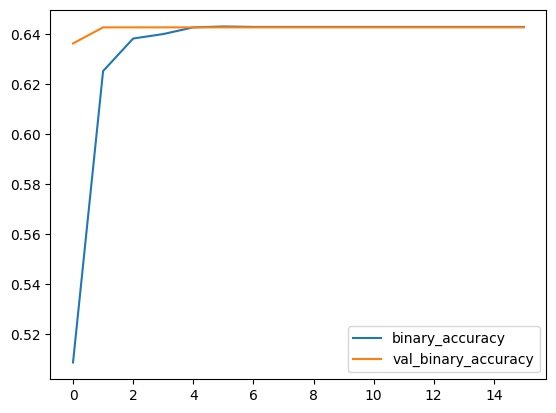

In [16]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

In [30]:
# Import models 
from sklearn.ensemble import RandomForestClassifier
# Fit the model 
model = RandomForestClassifier(random_state=0, n_estimators=100)
model.fit(X_train, y_train)
# Use the model to predict the test set
preds = model.predict(X_valid)
#preds = np.rint(preds)
print(preds.min())
# preds = 1- preds
# Let's test it out quanitativaively
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_valid, preds)
acc = accuracy_score(y_valid, preds)
prec = precision_score(y_valid, preds,)
rec = recall_score(y_valid, preds,)
f1 = f1_score(y_valid, preds)
print(f"Confusion Matrix: {conf_matrix}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

0.0
Confusion Matrix: [[690 211]
 [379 122]]
Accuracy: 0.579172610556348
Precision: 0.3663663663663664
Recall: 0.2435129740518962
F1 Score: 0.29256594724220625


In [96]:
def create_model(train, features):
    X = train[features]
    y = train["Heart Attack Risk"]
    from sklearn.model_selection import train_test_split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, f1_score

    model = RandomForestClassifier(random_state=0, n_estimators=100)
    model.fit(X_train, y_train)

    preds = model.predict(X_valid)
    #preds = np.rint(preds)
    print(preds.min())
    # preds = 1- preds
    from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

    conf_matrix = confusion_matrix(y_valid, preds)
    acc = accuracy_score(y_valid, preds)
    prec = precision_score(y_valid, preds,)
    rec = recall_score(y_valid, preds,)
    f1 = f1_score(y_valid, preds)
    print(f"Confusion Matrix: {conf_matrix}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {prec}")
    print(f"Recall: {rec}")
    print(f"F1 Score: {f1}")
    return model, preds
fs = train.columns.array
fs = np.setdiff1d(fs, np.array(["Heart Attack Risk"]))
models = []
for x in range(0, len(fs), 4):
    print(fs[x:x+4])
    models.append(create_model(train, fs[x:x+4]))

['Age' 'Alcohol Consumption' 'BMI' 'Cholesterol']
0.0
Confusion Matrix: [[741 160]
 [407  94]]
Accuracy: 0.5955777460770328
Precision: 0.3700787401574803
Recall: 0.18762475049900199
F1 Score: 0.2490066225165563
['Continent' 'Country' 'Diabetes' 'Diastolic']
0.0
Confusion Matrix: [[602 299]
 [342 159]]
Accuracy: 0.5427960057061341
Precision: 0.3471615720524017
Recall: 0.31736526946107785
F1 Score: 0.33159541188738273
['Diet' 'ExcersicePerSedimentary' 'Exercise Hours Per Week'
 'Family History']
0.0
Confusion Matrix: [[697 204]
 [384 117]]
Accuracy: 0.5805991440798859
Precision: 0.3644859813084112
Recall: 0.23353293413173654
F1 Score: 0.2846715328467153
['Heart Rate' 'Hemisphere' 'Income' 'Medication Use']
0.0
Confusion Matrix: [[649 252]
 [353 148]]
Accuracy: 0.5684736091298146
Precision: 0.37
Recall: 0.2954091816367265
F1 Score: 0.32852386237513875
['Obesity' 'Patient ID' 'Physical Activity Days Per Week'
 'Previous Heart Problems']
0.0
Confusion Matrix: [[594 307]
 [317 184]]
Accuracy

In [97]:
preds = []
for m in models:
    preds.append(m[1])
model_results = pd.DataFrame(preds).transpose()
model_results["Combined"] = model_results.apply(lambda x: 1 if x.mean() > 0.35 else 0, axis=1)


In [84]:
model_results

,0,1,2,3,4,5,6,Combined
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...
1397,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
1398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1399,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [98]:
accuracy_score(model_results["Combined"], y_valid)

0.557774607703281

In [99]:
f1_score(model_results["Combined"], y_valid)

0.35684647302904565

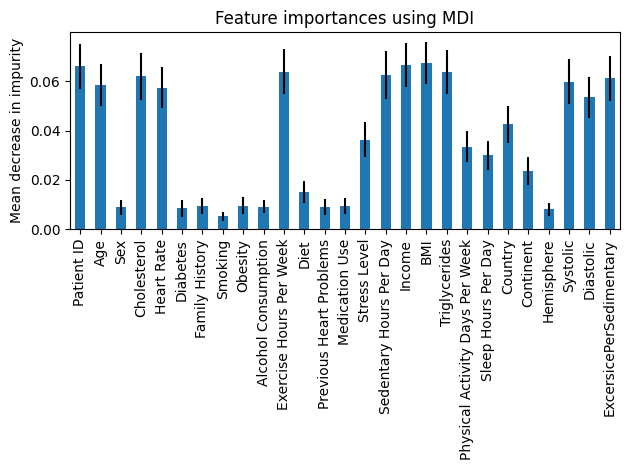

In [22]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns.array)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [23]:
from sklearn.inspection import permutation_importance

importances = permutation_importance(model, X_valid, y_valid, n_repeats=10, scoring="accuracy")
forest_importances = pd.Series(importances.importances_mean, index=X_valid.columns.array)


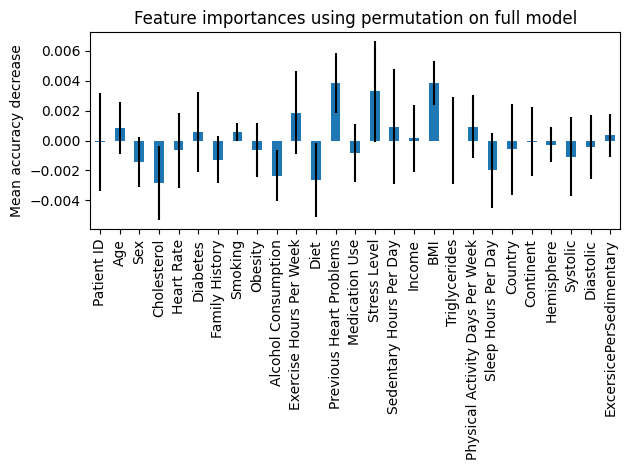

In [24]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [36]:
# Doing the same thing as before but we're trying out k nearest neighbors to see if that works. 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_valid)
#preds = np.rint(preds)
print(preds.min())
# preds = 1- preds
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

conf_matrix = confusion_matrix(y_valid, preds)
acc = accuracy_score(y_valid, preds)
prec = precision_score(y_valid, preds,)
rec = recall_score(y_valid, preds,)
f1 = f1_score(y_valid, preds)
print(f"Confusion Matrix: {conf_matrix}")
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1 Score: {f1}")

0
Confusion Matrix: [[663 238]
 [355 146]]
Accuracy: 0.5770328102710414
Precision: 0.3802083333333333
Recall: 0.29141716566866266
F1 Score: 0.32994350282485874


In [75]:
# from sklearn.ensemble import BaggingClassifier
# # model = XGBClassifier(n_estimators=500)
# model = BaggingClassifier(KNeighborsClassifier(), max_features=0.5, max_samples=0.5)
# model.fit(X_train, y_train)

# preds = model.predict(X_valid)
# # preds = np.rint(preds)

# # preds = 1- preds
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# conf_matrix = confusion_matrix(y_valid, preds)
# acc = accuracy_score(y_valid, preds)
# prec = precision_score(y_valid, preds)
# rec = recall_score(y_valid, preds)
# f1 = f1_score(y_valid, preds)
# print(f"Confusion Matrix: {conf_matrix}")
# print(f"Accuracy: {acc}")
# print(f"Precision: {prec}")
# print(f"Recall: {rec}")
# print(f"F1 Score: {f1}")


Confusion Matrix: [[473 428]
 [464 437]]
Accuracy: 0.5049944506104328
Precision: 0.5052023121387283
Recall: 0.48501664816870144
F1 Score: 0.49490373725934317


In [76]:
# from sklearn.svm import LinearSVC

# model = LinearSVC()

# model.fit(X_train, y_train)
# preds = model.predict(X_valid)
# conf_matrix = confusion_matrix(y_valid, preds)
# acc = accuracy_score(y_valid, preds)
# prec = precision_score(y_valid, preds,)
# rec = recall_score(y_valid, preds,)
# f1 = f1_score(y_valid, preds)
# print(preds.max())
# print(f"Confusion Matrix: {conf_matrix}")
# print(f"Accuracy: {acc}")
# print(f"Precision: {prec}")
# print(f"Recall: {rec}")
# print(f"F1 Score: {f1}")

1.0
Confusion Matrix: [[451 450]
 [467 434]]
Accuracy: 0.4911209766925638
Precision: 0.49095022624434387
Recall: 0.4816870144284129
F1 Score: 0.4862745098039215


In [237]:
test_df = pd.read_csv("/kaggle/input/heart-attack-risk-analysis/test.csv")
test_df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,3,6.766948,50533,35.074391,191,3,10,Spain,Europe,Southern Hemisphere
1749,FDK8693,34,Female,304,102/92,93,0,1,0,1,...,10,6.900037,223874,22.418494,791,4,5,China,Asia,Northern Hemisphere
1750,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,3,6.634988,228009,23.793280,748,5,8,Spain,Europe,Southern Hemisphere
1751,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,3,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere


In [238]:
test_df[['Systolic', 'Diastolic']] = test_df['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns to numeric type (optional)
test_df.Systolic = pd.to_numeric(test_df.Systolic)
test_df.Diastolic = pd.to_numeric(test_df.Diastolic)
test_df = test_df.drop("Blood Pressure", axis=1)
ids = test_df.pop("Patient ID")

In [239]:
categorical_test_cols = [col for col in test_df.columns if test_df[col].dtype == "object"]
test_df[categorical_test_cols] = ordinal.transform(test_df[categorical_test_cols])

#test_scaled= pd.DataFrame(MinMaxScaler().fit_transform(test_df))

In [240]:

test_df.columns = test_df.columns

In [241]:
X_test = test_df[features]
X_test

print(features)

y_preds = model.predict(X_test)

['Physical Activity Days Per Week', 'Diastolic', 'Previous Heart Problems', 'Systolic', 'Stress Level']


In [242]:
y_preds_series = pd.Series(y_preds)

In [243]:
y_preds_series.mean()

0.1739874500855676

In [ ]:
submission = pd.DataFrame([ids, y_preds])
submission = submission.transpose()

In [ ]:
submission.columns = ["Patient ID", "Heart Attack Risk"]
submission

In [ ]:
submission.to_csv("submission.csv", index=False)